'Accuracy = 94.12210845657944% \n Confusion Matrix = [[9801   27]\n [ 593  127]]'

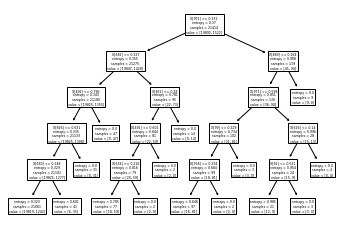

In [1]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score
from sklearn import tree

# dataset - tweets to get if it is positive(0) or negative(1)
train_dataset = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")
test_dataset = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv")
train = train_dataset.copy()
test = test_dataset.copy()
combined = train.append(test,ignore_index=True,sort=True)
# pre_processing
def remove_at(text,pattern="@"):
    r = re.findall("@[\w]*",text)
    for i in r:
        text = re.sub(i,"",text)
    return text
def remove_hash(text,pattern="#"):
    r = re.findall("#[\w]*",text)
    for i in r:
        text = re.sub(i,"",text)
    return text
# Removing Punctuations
combined['tweet'] = np.vectorize(remove_at)(combined['tweet'])
combined['tweet'] = np.vectorize(remove_hash)(combined['tweet'])
combined['tweet'] = combined['tweet'].str.replace("[^a-zA-Z#]", " ")
# Tokenizing
combined['tweet'] = combined['tweet'].apply(lambda x: [w.lower() for w in x.split()])
# Eliminating words which are less than 4 words
combined['tweet'] = combined['tweet'].apply(lambda x: [w.lower() for w in x if len(w)>3])
# Stemming words
combined['tweet'] = combined['tweet'].apply(lambda x: " ".join([PorterStemmer().stem(w) for w in x]))
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combined['tweet'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
# splitting
train_tfidf_matrix = tfidf_matrix[:31962]
# data in a matrix
train_tfidf_matrix.todense()
x_train, x_test, y_train, y_test = train_test_split(train_tfidf_matrix,train['label'],test_size=0.33,random_state=17)
# creating and pruning Decision Tree
dct = tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=5)
dct.fit(x_train, y_train)
y_pred = dct.predict(x_test)
tree.plot_tree(dct)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
f"Accuracy = {acc*100}% \n Confusion Matrix = {cm}"